<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18055 entries, 0 to 18054
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       18055 non-null  object 
 1   location_name                 18055 non-null  object 
 2   region                        18055 non-null  object 
 3   latitude                      18055 non-null  float64
 4   longitude                     18055 non-null  float64
 5   timezone                      18055 non-null  object 
 6   last_updated_epoch            18055 non-null  int64  
 7   last_updated                  18055 non-null  object 
 8   temperature_celsius           18055 non-null  float64
 9   temperature_fahrenheit        18055 non-null  float64
 10  condition_text                18055 non-null  object 
 11  wind_mph                      18055 non-null  float64
 12  wind_kph                      18055 non-null  float64
 13  w

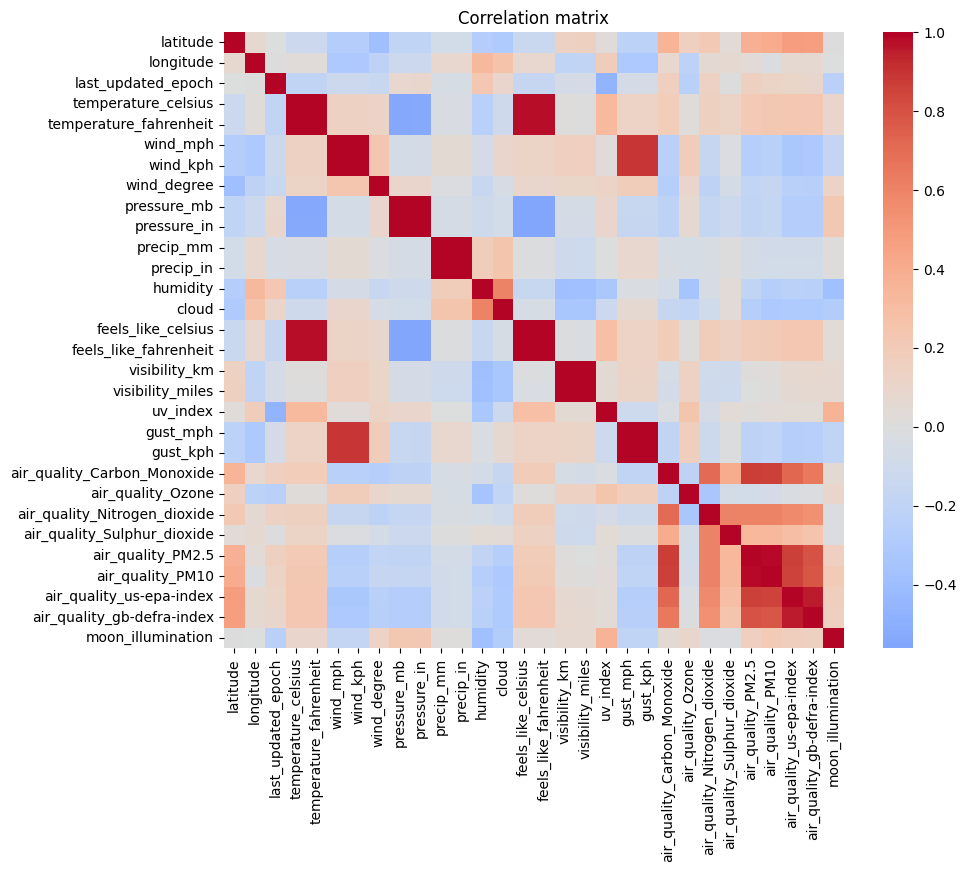

Top polluted cities:
                 avg_temp  max_temp    avg_hum    avg_pm25
location_name                                            
Faridabad      27.551515      33.0  82.757576  221.266667
Shahdara       27.633333      33.0  82.515152  199.890909
Gurgaon        27.548485      33.0  82.787879  191.624242
New Delhi      27.654545      33.0  82.303030  190.400000
Jalandhar      25.451515      31.3  71.969697  162.193939
Ludhiana       25.000000      31.0  73.606061  159.906061
Ghaziabad      27.554545      33.0  82.757576  159.481818
Niwari         27.503030      33.0  83.242424  158.545455
Kapurthala     26.681818      32.0  88.000000  153.869697
Amritsar       27.060606      32.0  89.212121  148.739394


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\TUF ASUS\Intellipat\SQL\PRT\IndianWeatherRepository.csv")
# Summaries
print(df.info())
print(df.describe().T[['mean','std','min','max']].round(2))

# City-level averages
city_summary = (df.groupby('location_name')
                  .agg(avg_temp=('temperature_celsius','mean'),
                       max_temp=('temperature_celsius','max'),
                       avg_hum=('humidity','mean'),
                       avg_pm25=('air_quality_PM2.5','mean'))
                  .sort_values('avg_temp', ascending=False))
print(city_summary.head())

# Daily averages per city
df['date'] = pd.to_datetime(df['last_updated']).dt.date
daily_city = (df.groupby(['location_name','date'])
                .agg(avg_temp=('temperature_celsius','mean'),
                     avg_hum=('humidity','mean'),
                     avg_pm25=('air_quality_PM2.5','mean'))
                .reset_index())

# Heatmap: correlation across all numeric cols
corr = df.select_dtypes('number').corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation matrix")
plt.show()

# Top 10 polluted cities
top_polluted = city_summary.sort_values('avg_pm25', ascending=False).head(10)
print("Top polluted cities:\n", top_polluted)
